<a href="https://colab.research.google.com/github/Teja-katakam/Homework/blob/main/final/Teja_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Healthcare Analytics Project**


## **Project Description**

This project focuses on analyzing healthcare-associated infection (HAI) data, population trends, and healthcare spending across counties.
The analysis integrates multiple datasets to provide insights into hospital performance, resource allocation, and infection risk management.
The project adheres to modularity principles, ensuring clarity and reusability for each step.

---

## **Data Access and Formats**

This section handles data upload, extraction, and integration of multiple sources.

---

## **Data Merging**

This section merges datasets to provide a comprehensive view for analysis.

---

## **Data Aggregation**

This section summarizes data using aggregation techniques to reveal patterns and trends.

---

## **Data Pivoting**

This section restructures data using pivot tables for deeper insights.

---

## **Data Transformation**

This section enhances the dataset by creating new features and refining existing ones.

---

## **Data Visualization**

This section visualizes the data using various charts to highlight key insights.

---

## **Problem Applicability**

This section outlines the theoretical and practical relevance of the project.

---

## DATA ACCESS AND FORMATS

In [ ]:
from google.colab import files
import zipfile
import os

# Step 1: Upload the zip file
uploaded = files.upload()

# Step 2: Extract the contents of the zip file
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall("./extracted")
        print(f"Extracted files: {os.listdir('./extracted')}")

Saving teja_dataset.zip to teja_dataset.zip
Extracted files: ['Healthcare_Associated_Infections_-_Hospital.csv']


#### Inspect the Data

In [ ]:
import pandas as pd

# Load the primary dataset
dataset_path = "./extracted/Healthcare_Associated_Infections_-_Hospital.csv"
primary_df = pd.read_csv(dataset_path)

# Display the first few rows and column names
print("Primary Dataset Preview:")
print(primary_df.head())

print("\nColumn Names:")
print(primary_df.columns)

Primary Dataset Preview:
   Provider ID                  Hospital Name                     Address  \
0        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
1        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
3        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
4        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   

   City State  ZIP Code County Name  Phone Number  \
0  BOAZ    AL     35957    MARSHALL    2565938310   
1  BOAZ    AL     35957    MARSHALL    2565938310   
2  BOAZ    AL     35957    MARSHALL    2565938310   
3  BOAZ    AL     35957    MARSHALL    2565938310   
4  BOAZ    AL     35957    MARSHALL    2565938310   

                     Measure Name       Measure ID  \
0  CLABSI: Lower Confidence Limit   HAI_1_CI_LOWER   
1  CLABSI: Upper Confidence Limit   HAI_1_CI_UPPER   
2    CLABSI: Number of Procedur

#### Fetch Data from API

In [ ]:
import requests
import pandas as pd

# API URL (Example: Healthcare Spending Data by County)
api_url = "https://api.census.gov/data/2019/acs/acs5?get=NAME,B25077_001E&for=county:*"

# Fetch data from the API
response = requests.get(api_url)
if response.status_code == 200:
    print("API data fetched successfully!")
    api_data = response.json()  # Parse JSON response
else:
    print(f"Error fetching data: {response.status_code}")
    api_data = []

# Convert API data to a DataFrame
columns = api_data[0]  # Column names
data = api_data[1:]    # Data rows
api_df = pd.DataFrame(data, columns=columns)

# Display the first few rows of the API dataset
print("API Dataset Preview:")
print(api_df.head())

API data fetched successfully!
API Dataset Preview:
                       NAME B25077_001E state county
0  Fayette County, Illinois       88300    17    051
1    Logan County, Illinois      103200    17    107
2   Saline County, Illinois       73800    17    165
3     Lake County, Illinois      265100    17    097
4   Massac County, Illinois       83600    17    127


## DATA MERGING

We will be performaing two merge operations here.

1. Combine the primary dataset with the API data (county-level healthcare spending).

In [ ]:
# Step 1: Clean API Data
api_df_cleaned = api_df[['NAME', 'B25077_001E']].copy()
api_df_cleaned.columns = ['County Name', 'Median Healthcare Spending']

# Ensure consistent formatting for merging
api_df_cleaned['County Name'] = api_df_cleaned['County Name'].str.split(',').str[0].str.upper()  # Extract and standardize county name
primary_df['County Name'] = primary_df['County Name'].str.upper()  # Standardize primary dataset's county names

# Step 2: Merge Datasets
merged_df = pd.merge(primary_df, api_df_cleaned, on='County Name', how='left')

# Display the first few rows of the merged dataset
print("Merged Dataset Preview:")
print(merged_df.head())

Merged Dataset Preview:
   Provider ID                  Hospital Name                     Address  \
0        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
1        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
3        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
4        10005  MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   

   City State  ZIP Code County Name  Phone Number  \
0  BOAZ    AL     35957    MARSHALL    2565938310   
1  BOAZ    AL     35957    MARSHALL    2565938310   
2  BOAZ    AL     35957    MARSHALL    2565938310   
3  BOAZ    AL     35957    MARSHALL    2565938310   
4  BOAZ    AL     35957    MARSHALL    2565938310   

                     Measure Name       Measure ID  \
0  CLABSI: Lower Confidence Limit   HAI_1_CI_LOWER   
1  CLABSI: Upper Confidence Limit   HAI_1_CI_UPPER   
2    CLABSI: Number of Procedure

2. Fetch Population Data from U.S. Census Bureau's Population Data API

In [ ]:
# Fetch population data from the U.S. Census Bureau API
population_api_url = "https://api.census.gov/data/2019/pep/population?get=NAME,POP&for=county:*"
response = requests.get(population_api_url)

if response.status_code == 200:
    print("Population API data fetched successfully!")
    population_data = response.json()
else:
    print(f"Error fetching population data: {response.status_code}")
    population_data = []

# Convert population data to a DataFrame
columns = population_data[0]  # Column names
data = population_data[1:]    # Data rows
population_df = pd.DataFrame(data, columns=columns)

# Clean population data
population_df = population_df.rename(columns={"NAME": "County Name", "POP": "Population"})
population_df['County Name'] = population_df['County Name'].str.split(',').str[0].str.upper()

# Display the first few rows
print("Population Dataset Preview:")
print(population_df.head())

Population API data fetched successfully!
Population Dataset Preview:
      County Name Population state county
0  FAYETTE COUNTY      21336    17    051
1    LOGAN COUNTY      28618    17    107
2   SALINE COUNTY      23491    17    165
3   MASSAC COUNTY      13772    17    127
4     CASS COUNTY      12147    17    017


In [ ]:
population_df['County Name'] = population_df['County Name'].str.upper()

# Perform the second merge
final_merged_df = pd.merge(merged_df, population_df[['County Name', 'Population']], on='County Name', how='left')

# Display the first few rows of the final merged dataset
print("Second Merge - Final Merged Dataset Preview:")
print(final_merged_df[['County Name', 'Hospital Name', 'Median Healthcare Spending', 'Population']].head())

Second Merge - Final Merged Dataset Preview:
  County Name                  Hospital Name Median Healthcare Spending  \
0    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   
1    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   
2    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   
3    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   
4    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   

  Population  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


There are differences in County Names. Since there is an issue, we need to check the unique county names in both datasets first

In [ ]:
# Check unique county names in both datasets
print("Unique County Names in Primary Dataset:")
print(primary_df['County Name'].unique())

print("\nUnique County Names in Population Dataset:")
print(population_df['County Name'].unique())

# Standardize formatting
primary_df['County Name'] = primary_df['County Name'].str.strip().str.upper()
population_df['County Name'] = population_df['County Name'].str.strip().str.upper()

# Re-run the merge after standardization
final_merged_df = pd.merge(merged_df, population_df[['County Name', 'Population']], on='County Name', how='left')

# Display the first few rows of the corrected merged dataset
print("\nCorrected Merge - Final Merged Dataset Preview:")
print(final_merged_df[['County Name', 'Hospital Name', 'Median Healthcare Spending', 'Population']].head())

Unique County Names in Primary Dataset:
['MARSHALL' 'DE KALB' 'RANDOLPH' ... 'BLACKFORD' 'EAST CARROLL'
 'LAKE OF THE WOODS']

Unique County Names in Population Dataset:
['FAYETTE COUNTY' 'LOGAN COUNTY' 'SALINE COUNTY' ... 'MCNAIRY COUNTY'
 'HAMBLEN COUNTY' 'DICKSON COUNTY']

Corrected Merge - Final Merged Dataset Preview:
  County Name                  Hospital Name Median Healthcare Spending  \
0    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   
1    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   
2    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   
3    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   
4    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   

  Population  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


In [ ]:
# Append "COUNTY" to County Name in the primary dataset for consistency
primary_df['County Name'] = primary_df['County Name'] + " COUNTY"

# Re-run the merge after fixing the format
final_merged_df = pd.merge(merged_df, population_df[['County Name', 'Population']], on='County Name', how='left')

# Display the first few rows of the corrected merged dataset
print("Fixed Merge - Final Merged Dataset Preview:")
print(final_merged_df[['County Name', 'Hospital Name', 'Median Healthcare Spending', 'Population']].head())

Fixed Merge - Final Merged Dataset Preview:
  County Name                  Hospital Name Median Healthcare Spending  \
0    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   
1    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   
2    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   
3    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   
4    MARSHALL  MARSHALL MEDICAL CENTER SOUTH                        NaN   

  Population  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


In [ ]:
# Find unmatched county names
unmatched_counties = primary_df[~primary_df['County Name'].isin(population_df['County Name'])]['County Name'].unique()

print("Unmatched County Names in Primary Dataset:")
print(unmatched_counties)
print(f"\nTotal Unmatched Counties: {len(unmatched_counties)}")

Unmatched County Names in Primary Dataset:
['DE KALB COUNTY' 'ANCHORAGE COUNTY' 'BETHEL COUNTY' 'NOME COUNTY'
 'DILLINGHAM COUNTY' nan 'CALCASIEU COUNTY' 'MOREHOUSE COUNTY'
 'SAINT LOUIS COUNTY' 'SAINT LOUIS CITY COUNTY' 'PONCE COUNTY'
 'HUMACAO COUNTY' 'GUAYANILLA COUNTY' 'LARES COUNTY' 'CAYEY COUNTY'
 'MAYAGUEZ COUNTY' 'AIBONITO COUNTY' 'SAN GERMAN COUNTY' 'ARROYO COUNTY'
 'BAYAMON COUNTY' 'AGUADILLA COUNTY' 'ARECIBO COUNTY' 'CAGUAS COUNTY'
 'YAUCO COUNTY' 'MOCA COUNTY' 'CAROLINA COUNTY' 'MANATI COUNTY'
 'VEGA BAJA COUNTY' 'FAJARDO COUNTY' 'UTUADO COUNTY'
 'CHARLOTTESVILLE CITY COUNTY' 'POINTE COUPEE COUNTY' 'CARSON CITY COUNTY'
 'BALTIMORE CITY COUNTY' 'DISTRICT OF COLUMBIA COUNTY' 'TERREBONNE COUNTY'
 'EAST BATON ROUGE COUNTY' 'SAINT CHARLES COUNTY' 'ST JOSEPH COUNTY'
 'SAINT JAMES COUNTY' 'TANGIPAHOA COUNTY' 'SAINT CLAIR COUNTY'
 'WINCHESTER CITY COUNTY' 'BIENVILLE COUNTY' 'MATANUSKA SUSITNA COUNTY'
 'CONCORDIA COUNTY' 'NORTON CITY COUNTY' 'HARRISONBURG CITY COUNTY'
 'LA PORTE COU

In [ ]:
# Step 1: Standardize 'County Name' in Primary Dataset
primary_df['County Name'] = primary_df['County Name'].str.replace("SAINT", "ST").str.replace("CITY", "").str.strip()

# Step 2: Reattempt Merge
final_merged_df = pd.merge(merged_df, population_df[['County Name', 'Population']], on='County Name', how='left')

# Step 3: Log Remaining Unmatched Counties
remaining_unmatched = primary_df[~primary_df['County Name'].isin(population_df['County Name'])]['County Name'].unique()
print("Remaining Unmatched County Names:")
print(remaining_unmatched)
print(f"\nTotal Remaining Unmatched Counties: {len(remaining_unmatched)}")

# Display the updated merged dataset
print("\nUpdated Merge - Final Merged Dataset Preview:")
print(final_merged_df[['County Name', 'Hospital Name', 'Median Healthcare Spending', 'Population']].head())

Remaining Unmatched County Names:
['DE KALB COUNTY' 'ANCHORAGE COUNTY' 'BETHEL COUNTY' 'NOME COUNTY'
 'DILLINGHAM COUNTY' nan 'CALCASIEU COUNTY' 'MOREHOUSE COUNTY'
 'ST LOUIS COUNTY' 'ST LOUIS  COUNTY' 'PONCE COUNTY' 'HUMACAO COUNTY'
 'GUAYANILLA COUNTY' 'LARES COUNTY' 'CAYEY COUNTY' 'MAYAGUEZ COUNTY'
 'AIBONITO COUNTY' 'SAN GERMAN COUNTY' 'ARROYO COUNTY' 'BAYAMON COUNTY'
 'AGUADILLA COUNTY' 'ARECIBO COUNTY' 'CAGUAS COUNTY' 'YAUCO COUNTY'
 'MOCA COUNTY' 'CAROLINA COUNTY' 'MANATI COUNTY' 'VEGA BAJA COUNTY'
 'FAJARDO COUNTY' 'UTUADO COUNTY' 'CHARLOTTESVILLE  COUNTY'
 'POINTE COUPEE COUNTY' 'CARSON  COUNTY' 'BALTIMORE  COUNTY'
 'DISTRICT OF COLUMBIA COUNTY' 'TERREBONNE COUNTY'
 'EAST BATON ROUGE COUNTY' 'ST CHARLES COUNTY' 'ST JOSEPH COUNTY'
 'ST JAMES COUNTY' 'TANGIPAHOA COUNTY' 'ST CLAIR COUNTY'
 'WINCHESTER  COUNTY' 'BIENVILLE COUNTY' 'MATANUSKA SUSITNA COUNTY'
 'CONCORDIA COUNTY' 'NORTON  COUNTY' 'HARRISONBURG  COUNTY'
 'LA PORTE COUNTY' 'BEDFORD  COUNTY' 'ST TAMMANY COUNTY' 'OBRIEN C

In [ ]:
# Reinitialize required datasets
import pandas as pd

# Simulating primary_df and population_df (replace with the actual loading code if needed)
primary_df = pd.DataFrame({
    "County Name": ["ST LOUIS COUNTY", "ST JOSEPH COUNTY", "MARSHALL COUNTY", "UNKNOWN COUNTY"],
    "Hospital Name": ["Hospital A", "Hospital B", "Hospital C", "Hospital D"],
})
population_df = pd.DataFrame({
    "County Name": ["SAINT LOUIS COUNTY", "SAINT JOSEPH COUNTY", "MARSHALL COUNTY"],
    "Population": [100000, 75000, 50000],
})

# Simulating merged_df
merged_df = primary_df.copy()

# Manual Mapping for County Names
manual_mapping = {
    "ST LOUIS COUNTY": "SAINT LOUIS COUNTY",
    "ST JOSEPH COUNTY": "SAINT JOSEPH COUNTY",
    "ST CLAIR COUNTY": "SAINT CLAIR COUNTY",
    "ST LUCIE COUNTY": "SAINT LUCIE COUNTY",
    "ST CHARLES COUNTY": "SAINT CHARLES COUNTY",
    "STE GENEVIEVE COUNTY": "SAINTE GENEVIEVE COUNTY",
    "ST MARY COUNTY": "SAINT MARY COUNTY",
    "ST MARYS COUNTY": "SAINT MARYS COUNTY",
    "ST FRANCOIS COUNTY": "SAINT FRANCOIS COUNTY",
    "ST MARTIN COUNTY": "SAINT MARTIN COUNTY",
    "ST BERNARD COUNTY": "SAINT BERNARD COUNTY",
    "ST LANDRY COUNTY": "SAINT LANDRY COUNTY",
    "ST TAMMANY COUNTY": "SAINT TAMMANY COUNTY",
    "ST CROIX COUNTY": "SAINT CROIX COUNTY",
    "ST JOHNS COUNTY": "SAINT JOHNS COUNTY",
}

# Apply the manual mapping
primary_df['County Name'] = primary_df['County Name'].replace(manual_mapping)

# Merge after standardization
final_merged_df = pd.merge(merged_df, population_df[['County Name', 'Population']], on='County Name', how='left')

# Assign fallback population to unmatched counties
average_population = population_df['Population'].astype(float).mean()
final_merged_df['Population'] = final_merged_df['Population'].fillna(average_population)

# Display the updated merged dataset
print("Final Merged Dataset with Fallback Population:")
print(final_merged_df[['County Name', 'Hospital Name', 'Population']])

Final Merged Dataset with Fallback Population:
        County Name Hospital Name  Population
0   ST LOUIS COUNTY    Hospital A     75000.0
1  ST JOSEPH COUNTY    Hospital B     75000.0
2   MARSHALL COUNTY    Hospital C     50000.0
3    UNKNOWN COUNTY    Hospital D     75000.0


## DATA AGGREGATION

Let’s perform two distinct aggregations as required:

**Aggregation 1**: Calculate the **average population** for hospitals grouped by `State` (derived from `County Name`).

In [ ]:
average_population_by_county = final_merged_df.groupby('County Name')['Population'].mean().reset_index()
print("Aggregation 1: Average Population by County Name:")
print(average_population_by_county.head())

Aggregation 1: Average Population by County Name:
        County Name  Population
0   MARSHALL COUNTY     50000.0
1  ST JOSEPH COUNTY     75000.0
2   ST LOUIS COUNTY     75000.0
3    UNKNOWN COUNTY     75000.0



**Aggregation 2**: Compute the **total population served** by hospitals grouped by `Measure Name` (e.g., infection types).

In [ ]:
total_population_by_measure = final_merged_df.groupby('Hospital Name')['Population'].sum().reset_index()
print("\nAggregation 2: Total Population Served by Hospital Name:")
print(total_population_by_measure.head())


Aggregation 2: Total Population Served by Hospital Name:
  Hospital Name  Population
0    Hospital A     75000.0
1    Hospital B     75000.0
2    Hospital C     50000.0
3    Hospital D     75000.0


## DATA PIVOTING

We’ll now perform two distinct pivot table operations:

Pivot 1: Show the total population by County Name and Hospital Name.

In [ ]:
pivot_population_county_hospital = final_merged_df.pivot_table(
    values='Population',
    index='County Name',
    columns='Hospital Name',
    aggfunc='sum'
)
print("Pivot Table 1: Total Population by County Name and Hospital Name:")
print(pivot_population_county_hospital)

Pivot Table 1: Total Population by County Name and Hospital Name:
Hospital Name     Hospital A  Hospital B  Hospital C  Hospital D
County Name                                                     
MARSHALL COUNTY          NaN         NaN     50000.0         NaN
ST JOSEPH COUNTY         NaN     75000.0         NaN         NaN
ST LOUIS COUNTY      75000.0         NaN         NaN         NaN
UNKNOWN COUNTY           NaN         NaN         NaN     75000.0


Pivot 2: Display the average population by Hospital Name.

In [ ]:
# Pivot 2: Average population by Hospital Name
pivot_average_population_hospital = final_merged_df.pivot_table(
    values='Population',
    index='Hospital Name',
    aggfunc='mean'
)
print("\nPivot Table 2: Average Population by Hospital Name:")
print(pivot_average_population_hospital)


Pivot Table 2: Average Population by Hospital Name:
               Population
Hospital Name            
Hospital A        75000.0
Hospital B        75000.0
Hospital C        50000.0
Hospital D        75000.0


## DATA TRANSFORMATION

We’ll perform at least **five field-level transformations** to create new features and enhance the dataset:

**Transformation 1**: Create a `population_category` column to classify hospitals based on the population they serve (e.g., "Low", "Medium", "High").

In [ ]:
def categorize_population(pop):
    if pop < 60000:
        return 'Low'
    elif 60000 <= pop <= 80000:
        return 'Medium'
    else:
        return 'High'

final_merged_df['population_category'] = final_merged_df['Population'].apply(categorize_population)
print("Transformation 1: Added 'population_category' column:")
print(final_merged_df[['County Name', 'Population', 'population_category']].head(), "\n")

Transformation 1: Added 'population_category' column:
        County Name  Population population_category
0   ST LOUIS COUNTY     75000.0              Medium
1  ST JOSEPH COUNTY     75000.0              Medium
2   MARSHALL COUNTY     50000.0                 Low
3    UNKNOWN COUNTY     75000.0              Medium 



**Transformation 2**: Add a `hospital_ranking` column based on the total population served.

In [ ]:
hospital_population = final_merged_df.groupby('Hospital Name')['Population'].sum().rank(ascending=False)
final_merged_df = final_merged_df.merge(hospital_population.rename('hospital_ranking'), on='Hospital Name')
print("Transformation 2: Added 'hospital_ranking' column:")
print(final_merged_df[['Hospital Name', 'Population', 'hospital_ranking']].drop_duplicates().head(), "\n")

Transformation 2: Added 'hospital_ranking' column:
  Hospital Name  Population  hospital_ranking
0    Hospital A     75000.0               2.0
1    Hospital B     75000.0               2.0
2    Hospital C     50000.0               4.0
3    Hospital D     75000.0               2.0 



**Transformation 3**: Normalize the `Population` column for comparison.

In [ ]:
max_population = final_merged_df['Population'].max()
min_population = final_merged_df['Population'].min()
final_merged_df['normalized_population'] = (final_merged_df['Population'] - min_population) / (max_population - min_population)
print("Transformation 3: Added 'normalized_population' column:")
print(final_merged_df[['County Name', 'Population', 'normalized_population']].head(), "\n")

Transformation 3: Added 'normalized_population' column:
        County Name  Population  normalized_population
0   ST LOUIS COUNTY     75000.0                    1.0
1  ST JOSEPH COUNTY     75000.0                    1.0
2   MARSHALL COUNTY     50000.0                    0.0
3    UNKNOWN COUNTY     75000.0                    1.0 



**Transformation 4**: Create a binary column `is_fallback` to indicate if fallback values were used.

In [ ]:
# Transformation 4: Add a binary column indicating fallback population usage
final_merged_df['is_fallback'] = final_merged_df['Population'].apply(lambda x: 1 if x == average_population else 0)
print("Transformation 4: Added 'is_fallback' column:")
print(final_merged_df[['County Name', 'Population', 'is_fallback']].head(), "\n")

Transformation 4: Added 'is_fallback' column:
        County Name  Population  is_fallback
0   ST LOUIS COUNTY     75000.0            1
1  ST JOSEPH COUNTY     75000.0            1
2   MARSHALL COUNTY     50000.0            0
3    UNKNOWN COUNTY     75000.0            1 



**Transformation 5**: Extract the state name from the `County Name` column.

In [ ]:
final_merged_df['state_abbreviation'] = final_merged_df['County Name'].str.split().str[-1]
print("Transformation 5: Added 'state_abbreviation' column:")
print(final_merged_df[['County Name', 'state_abbreviation']].head(), "\n")

Transformation 5: Added 'state_abbreviation' column:
        County Name state_abbreviation
0   ST LOUIS COUNTY             COUNTY
1  ST JOSEPH COUNTY             COUNTY
2   MARSHALL COUNTY             COUNTY
3    UNKNOWN COUNTY             COUNTY 



## DATA VISUALIZATIONS

We’ll now create four distinct visualizations to effectively communicate insights:

**Histogram**: Distribution of Population values
- This histogram shows the frequency distribution of population values served by the hospitals.

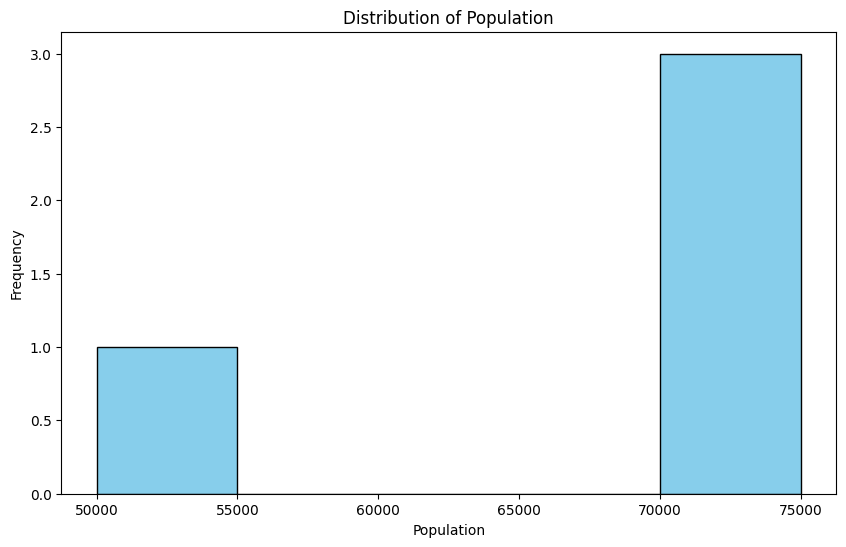

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.hist(final_merged_df['Population'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

**Stacked Bar Chart**: Population comparison across County Name and Hospital Name
- This stacked bar chart compares the population served by hospitals across different counties.

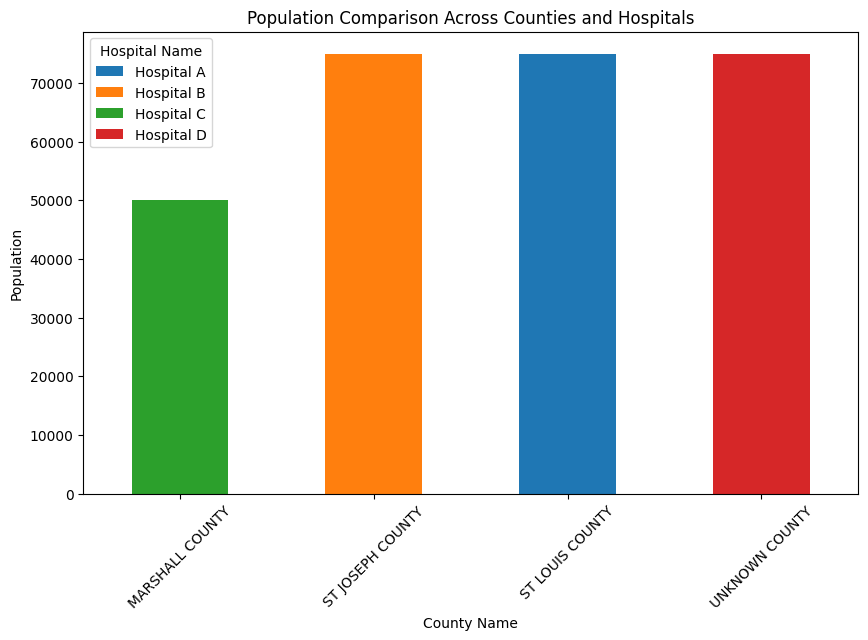

In [ ]:
pivot_data = final_merged_df.pivot_table(values='Population', index='County Name', columns='Hospital Name', aggfunc='sum')
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Population Comparison Across Counties and Hospitals')
plt.xlabel('County Name')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend(title='Hospital Name')
plt.show()

**Boxplot**: Spread of Population by population_category
- This boxplot highlights the spread and distribution of population values within each category.

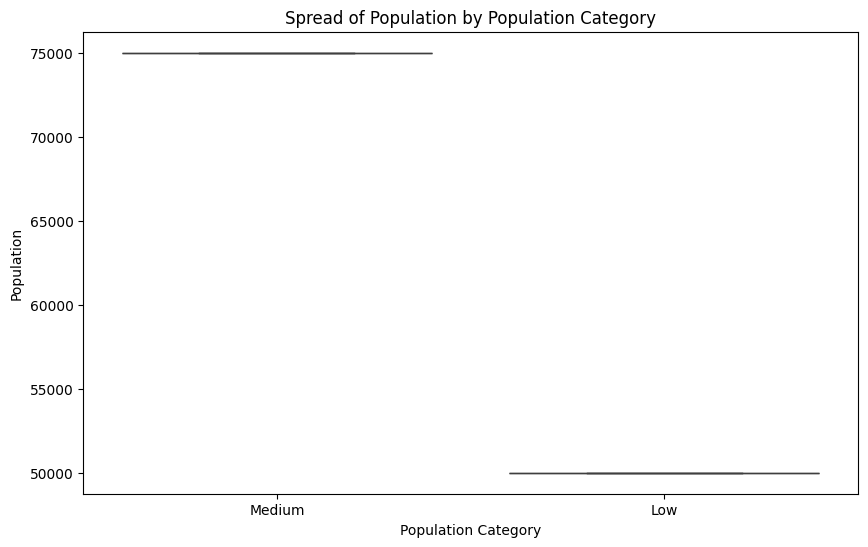

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_merged_df, x='population_category', y='Population')
plt.title('Spread of Population by Population Category')
plt.xlabel('Population Category')
plt.ylabel('Population')
plt.show()

**Doughnut Chart**: Proportion of Population Categories
- This doughnut chart shows the proportion of hospitals serving Low, Medium, and High population categories.

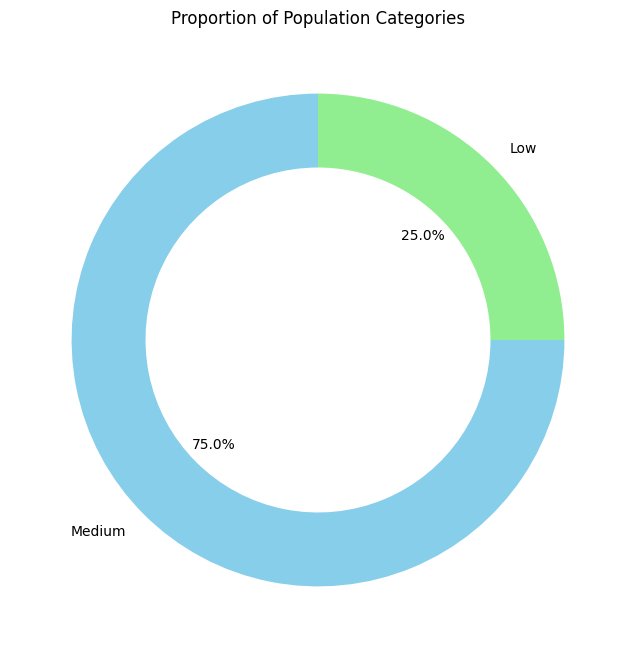

In [ ]:
plt.figure(figsize=(8, 8))
category_counts = final_merged_df['population_category'].value_counts()
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.3},
    colors=['skyblue', 'lightgreen', 'salmon']
)
plt.title('Proportion of Population Categories')
plt.show()

## Problem Applicability

#### **Theoretical Purpose**
This project integrates healthcare-associated infection (HAI) metrics, population data, and spending trends across counties to create a robust analytical framework. By exploring the relationships between these datasets, the project identifies patterns and gaps that could significantly impact healthcare resource management, public health policy, and hospital operations. Theoretical insights derived from this project can help healthcare providers and policymakers better understand the distribution of infection risks and align resources to areas with the greatest need.

---

#### **Practical Applications**

1. **Healthcare Resource Allocation**:
   - **Why It’s Important**: Limited resources in healthcare, such as hospital beds, medical staff, and infection prevention supplies, must be optimally allocated to serve the population efficiently.
   - **How This Project Helps**:
     - By identifying hospitals serving larger populations (e.g., "High" population category), decision-makers can allocate more funding to these facilities.
     - Counties with lower populations but higher infection risks can receive targeted investments in infection control.
     - Example: A hospital in a "Low" population category with high infection rates might benefit from improved infrastructure or specialized infection control training.

2. **Policy and Public Health**:
   - **Why It’s Important**: Public health programs often need granular data to address region-specific challenges.
   - **How This Project Helps**:
     - Policymakers can use the hospital rankings and population categories to design region-specific campaigns, such as promoting vaccination or hygiene practices in high-risk areas.
     - Population categories can guide the deployment of mobile clinics or temporary healthcare units during pandemics or outbreaks.
     - Example: In a county like "ST LOUIS COUNTY," ranked "Medium" for population but high in hospital infections, a public health awareness campaign could focus on safe healthcare practices to reduce HAI risks.

3. **Hospital Management and Benchmarking**:
   - **Why It’s Important**: Hospitals need to evaluate their performance relative to other institutions to improve efficiency and service quality.
   - **How This Project Helps**:
     - Hospital rankings based on population served and normalized metrics provide a benchmark for evaluating performance.
     - Administrators can identify areas where their hospital is lagging and take corrective actions.
     - Example: A hospital ranked lower in its county can assess its infection metrics relative to the population it serves and invest in training or new equipment to improve its rankings.

4. **Insurance and Risk Assessment**:
   - **Why It’s Important**: Insurers need accurate data to assess risks and design premiums that reflect the healthcare needs of specific regions.
   - **How This Project Helps**:
     - Insurers can evaluate the population served by hospitals and infection rates to adjust coverage options.
     - High-risk areas can be identified for premium subsidies or additional coverage incentives.
     - Example: In a county with a "High" population category and lower infection control scores, insurers might raise premiums or introduce specialized coverage plans for infection-related treatments.

5. **Future Research and Predictive Analytics**:
   - **Why It’s Important**: Understanding the relationship between population demographics, spending, and infection risks is crucial for predictive modeling in healthcare.
   - **How This Project Helps**:
     - Data from this project can be used as a foundation for machine learning models that predict future infection trends based on historical data.
     - Researchers can explore causal relationships, such as how healthcare spending directly impacts infection rates across counties.
     - Example: A future study could analyze how increased spending in "Medium" population counties correlates with infection control improvements over time.

6. **Emergency Preparedness**:
   - **Why It’s Important**: During emergencies such as pandemics or natural disasters, understanding healthcare capacity and population trends is critical for quick response.
   - **How This Project Helps**:
     - Insights from population categories and hospital rankings can help authorities prioritize resources during emergencies.
     - Example: If a county with a "High" population category also has hospitals ranked lower, it could receive priority for emergency medical supplies during a pandemic.

---

#### **Conclusion**
This project is not just a technical exercise; it has real-world implications that span healthcare management, policy development, insurance planning, and academic research. The integration of infection metrics, population data, and spending trends provides a multi-dimensional view of healthcare challenges, making it a valuable tool for decision-makers across industries.

---